In [3]:
import functools
import sys
import random
import numpy as np 
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("train.csv",encoding="ISO-8859-1") 
df.head()

,id,title,text,label
0,1,Ancelotti: Timnas Spanyol Harus Bawa Ramos ke ...,Madrid - Pelatih Real Madrid Carlo Ancelotti m...,1
1,2,MONKEYPOX is 'very contagious' four days befor...,Cases of the illness were first detected in th...,1
2,3,VIRTUALLY REAL : Meta Quest Pro review: Ive b...,"After a week with the Meta Quest Pro, I've nev...",1
3,4,Russia resumes its participation in Ukraine gr...,Russia said Wednesday that it will resume its ...,1
4,5,"Nikola cuts production guidance, sending stock...",Electric heavy truck maker Nikola said that it...,1


In [10]:
df.columns

Index(['id', 'title', 'text', 'label'], dtype='object')

In [11]:
df.describe()

,id,label
count,1137.000000,1137.000000
mean,569.000000,0.551451
std,328.367934,0.497565
min,1.000000,0.000000
25%,285.000000,0.000000
50%,569.000000,1.000000
75%,853.000000,1.000000
max,1137.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1137 non-null   int64 
 1   title   1137 non-null   object
 2   text    1134 non-null   object
 3   label   1137 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 35.7+ KB


## Some Exploratory Data Analysis :

In [13]:
df.isnull().sum()

id       0
title    0
text     3
label    0
dtype: int64

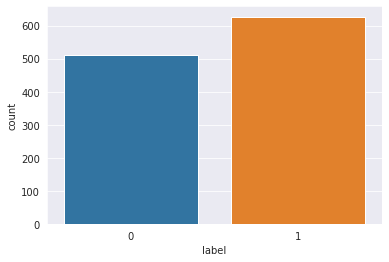

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)

In [15]:
df.groupby('label').count()

,id,title,text
label,,,
0,510,510,510
1,627,627,624


In [16]:
df['length']=df['title'].astype(str).apply(len)

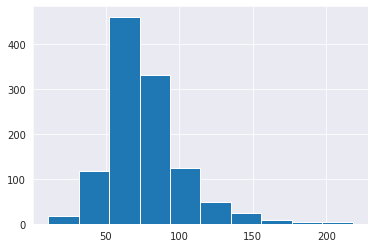

In [17]:
df['length'].hist()

In [18]:
df=df.dropna()
messages=df.copy()




In [19]:
messages.reset_index(inplace=True)

In [20]:
messages.head(10)

,index,id,title,text,label,length
0,0,1,Ancelotti: Timnas Spanyol Harus Bawa Ramos ke ...,Madrid - Pelatih Real Madrid Carlo Ancelotti m...,1,57
1,1,2,MONKEYPOX is 'very contagious' four days befor...,Cases of the illness were first detected in th...,1,88
2,2,3,VIRTUALLY REAL : Meta Quest Pro review: Ive b...,"After a week with the Meta Quest Pro, I've nev...",1,114
3,3,4,Russia resumes its participation in Ukraine gr...,Russia said Wednesday that it will resume its ...,1,114
4,4,5,"Nikola cuts production guidance, sending stock...",Electric heavy truck maker Nikola said that it...,1,82
5,5,6,Zelenskyy hails UN nuclear investigation resul...,Ukrainian President Volodymyr Zelenskyy praise...,1,103
6,6,7,Chelseas rivalry with Arsenal suddenly looks ...,"For the first time in several years, Arsenal s...",1,60
7,7,8,"TV Analog Dimatikan, Hary Tanoe Sebut MNC Grou...",Jakarta - Stasiun TV yang di bawah naungan MNC...,1,56
8,8,9,"Halalan Thayyiban dalam Al-Qur'an, Seperti Apa...",Jakarta - Mengutip buku Kebijakan Produk Hukum...,1,56
9,9,10,Presidents fight for every vote in Pennsylvani...,"President Biden, Donald Trump and Barack Obama...",1,84


In [22]:
df.groupby('text').nunique().T

text    "The Best Mix Of Hard-Hitting REAL News & Cutting-Edge Alternative News On The Web" "All Original Stories All The Time" Share This November 12, 2016 Readers Enraged By MSM Election Reporting - 'You Misled Your Readers, Blinded By Journalistic Bigotry' - Boycott All Mainstream Media And Their Lies In Their Efforts To Initiate The Overthrow Of Our Republic And Their Continuing Provocations In Stirring Up Civil Strife - Let The New Battle Cry For Truth Be "Turn Them Off And Tune Them Out!" By Susan Duclos - All News PipeLine Progressive liberals, George Soros and his merry band of paid protesters, and the mainstream media are certainly giving new meaning to William Shakespeare's " Fight to the last gasp ," quote, but what none of them seem to realize yet as they cry, scream, riot and offer their mea culpa's is that the fight is over, the election is finished, their opponents have gone home to celebrate and they are doing nothing but flailing in the wind while grunting incoherently.While anyone can see the headlines about the third day of protests and riots, and how those that are incapable of understanding quite how elections work and are holding out for a pipe-dream that maybe they can make electors of the electoral college change their vote, what many are missing is how the mainstream media is attempting to suck more air out oxygen tanks that have gone empty.... and they have no one to blame but themselves. THE ULTIMATE LOSERS IN THE 2016 ELECTION - THE MSM For the last year and a half we have witnessed and reported on the mainstream media's unrelenting and unapologetic campaign against Donald Trump, where 91 percent of the reporting since the party's convention, where he was named the GOP nominee, has been studied and found to have been negative, but even before that they treated Trump as if he didn't stand a chance to win that nomination.We have noted and reported via Wikileaks releases how that very same MSM had colluded with the DNC and the Clinton campaign in order to influence the public to elect Hillary Clinton.We have also observed and reported how Trump supporters were constantly labeled and portrayed as racist, sexist, xenophobic, Islamophobic, uneducated, uninformed, white nationalist deplorables, just to name a few of the colorful descriptors.How did that work out for them?Despite their biased reporting and throwing everything, including the kitchen sink, at Trump, we now have President-Elect Donald Trump headed for the White House, to be sworn in on January 20, 2017. While Hillary Clinton will fade into obscurity and the protesters will eventually go home just to criticize everything Trump does for the next four (maybe 8?) years, and progressives will get over their sworn "revolution" within the party between liberals and moderate Democrats, the ultimate losers are not Clinton supporters, celebrities that swore to leave the country if Trump won, nor Democrats as a party.... it is the mainstream media that was rendered irrelevant, crushed by a wave of "deplorables" and alternative media bypassing their once-influential status to communicate without their fasle prism of 'truth.' MSM'S LAST GASP Now they are offering their mea culpas, dedicating countless hours and ink to explaining and justifying how they were so wrong in their predictions that they knew ahead of time were based on a false premise, and taking their "last gasp" by swearing to "rededicate" themselves to reporting honestly, while at the same time claiming they reported on "both candidates fairly."I kid you not.Below is a letter by Arthur O. Sulzberger Jr. and Dean Baquet, the publisher and editor of the New York Times:First point is that if they had been reporting "fairly" as claimed in the letter above, they would not need to "rededicate" themselves to honesty. Secondly, they did not strive "to understand and reflect all political perspectives and life experiences," of Trump supporters, rather they maligned, criticized, belittled and mocked any

## Text Preprocessing :

In [28]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
cor=[]
ps=PorterStemmer()

In [30]:
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=messages['title'][i]
    review=review.lower()
    review=review.split()
    
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    cor.append(review)

In [31]:
cor[3]

'russia resum particip ukrain grain export deal; ukraine\x92 energi infrastructur \x91serious damaged\x92'

In [32]:
cor

['ancelotti: timna spanyol haru bawa ramo ke piala dunia',
 "monkeypox 'veri contagious' four day symptom appear, new research shown.",
 'virtual real : meta quest pro review: i\x92v secretli test mark zuckerberg\x92 vr headset i\x92m blown away',
 'russia resum particip ukrain grain export deal; ukraine\x92 energi infrastructur \x91serious damaged\x92',
 'nikola cut product guidance, send stock despit strong earn report',
 'zelenskyy hail un nuclear investig result; uk say russia like shoot retreat soldier',
 'chelsea\x92 rivalri arsen suddenli look differ',
 'tv analog dimatikan, hari tano sebut mnc group terpaksa',
 "halalan thayyiban dalam al-qur'an, seperti apa maknanya?",
 'presid fight everi vote pennsylvania, state could swing midterm',
 'ukrain war: kyiv mayor klitschko warn evacu power lost',
 "shyam saran negi: man dub 'india' first voter' die age 105",
 'sudhir suri: radic hindu leader shot dead amritsar',
 'india vaccin maker destroy 100 million dose expir covid jab',
 "no

## Normal Algorithm Set Up :

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [34]:
cv=CountVectorizer()
msg=cv.fit_transform(cor)

In [35]:
msg

<1134x3800 sparse matrix of type '<class 'numpy.int64'>'
	with 10304 stored elements in Compressed Sparse Row format>

In [36]:
tar=messages['label']

In [37]:
msg.shape

(1134, 3800)

In [38]:
tar.shape

(1134,)

In [39]:
tfidf=TfidfTransformer()

In [40]:
tf=tfidf.fit_transform(msg)

In [41]:
tf.shape

(1134, 3800)

## Train Test Split 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
msg_train,msg_test,tar_train,tar_test=train_test_split(tf,tar,test_size=0.3,random_state=0)

In [44]:
classifier_mod=MultinomialNB()

In [45]:
classifier_mod.fit(msg_train,tar_train)

MultinomialNB()

In [46]:
classifier_mod.predict(msg_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [47]:
cm_pred=classifier_mod.predict(msg_test)

### Metrics Evaluation :

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
print(classification_report(tar_test,cm_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       155
           1       0.82      0.88      0.85       186

    accuracy                           0.83       341
   macro avg       0.83      0.82      0.82       341
weighted avg       0.83      0.83      0.83       341



In [51]:
print(confusion_matrix(tar_test,cm_pred))

[[118  37]
 [ 22 164]]


In [52]:
print('The Accuracy Score Is : ',round(accuracy_score(tar_test,cm_pred),2))

The Accuracy Score Is :  0.83


## Pipeline :

### Train Test Split  For Pipeline :

In [60]:
X=messages['title']
y=messages['label']

In [61]:
X.shape

(1134,)

In [62]:
y.shape

(1134,)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_train.shape

(907,)

In [66]:
y_train.shape

(907,)

## Pipeline:

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [68]:
pipeline=Pipeline([
   ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [70]:
pipeline.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0])

In [71]:
pred=pipeline.predict(X_test)

In [72]:
df33=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df33.head(10)

,Actual,Predicted
260,1,1
801,1,1
731,1,0
697,0,0
222,0,0
980,1,1
705,1,1
767,0,1
537,0,0
621,1,1


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        91
           1       0.85      0.88      0.86       136

    accuracy                           0.83       227
   macro avg       0.83      0.82      0.82       227
weighted avg       0.83      0.83      0.83       227



In [75]:
print('The Accuracy Score Is :',round(accuracy_score(y_test,pred),2))

The Accuracy Score Is : 0.83


## As You can see , pipeline proved with better accuracy score and results..